# <span style="color:green"> Laboratorio di Simulazione Numerica </span>
## <span style="color:blue">  Esercizio 4 </span>

Si vuole studiare un volume di materia composto da atomi che interagiscono fra di loro tramite il potenziale di Lennard-Jones $$ V_{ij} = 4\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] $$ 
Il sistema viene studiato tramite la dinamica molecolare: viene preparato in una configurazione iniziale di posizioni e velocità e viene poi fatto evolvere tramite l'algoritmo di Verlet. Questo si basa sull'espansione di Taylor al terzo ordine della posizione al tempo t-$\delta t$ e al tempo t+ $\delta t$, sommando le due espansioni una dipenderà dall'altra e dall'accelerazione al tempo $t$. Questo algoritmo permette una buona conservazione dell'energia con l'evoluzione del sistema. 

Un problema del nostro studio sono le superfici, su cui risiederebbero un numero non trascurabile di particelle, queste risentirebbero di forze diverse rispetto alle altre all'interno del volume. Per risolvere questo problema introduciamo le $\textit{ periodic boundries condition} $: passiamo da un volume finito a uno infinito che ha simmetria traslazionale della gradezza del volume che ci interessa studiare, cosicchè lo spostarsi di una particella da una cella di volume a un'altra equivale al suo uscire da un bordo e rientrare dal lato opposto, in questo modo il numero di particella nella cella è conservato. 

Ci muoviamo quindi in un sistema in cui sono fissate: il numero di particelle (N), il volume (V), e l'energia (E).

Prima di fare le misurazioni con cui passare dai parametri microscopici a quelli macroscopici è necessario aspettare che l'evoluzione del sistema si stabilizzi, ovvero arrivi in una situazione in cui al variare dei parametri microscopici quelli macroscopici non varino, per comprendere quale sia il tempo di equilibrazione abbiamo preso di riferimento la temperatura, questa in particolare varierà al seguito del modificarsi dell'energia cinetica che dovrà cambiare in modo tale da mantenere la sua somma con l'energia potenziale, la quale a sua volta cambierà per il muoversi delle particelle dalla posizione iniziale. 

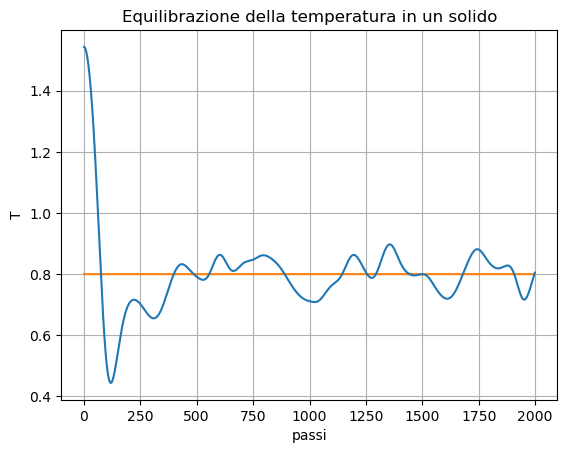

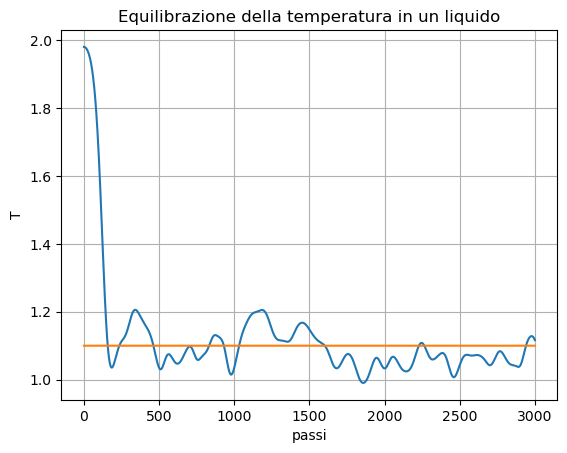

Text(0.5, 1.0, 'Equilibrazione della temperatura in un gas')

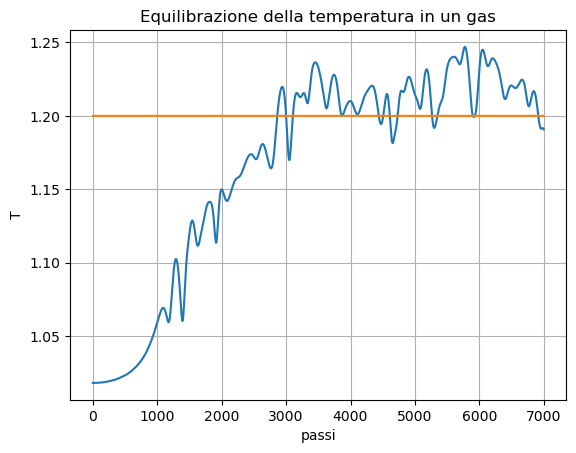

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(2000)

# Carica i dati dal file
data = np.loadtxt('risultati/solido/output_tempeq.dat')

plt.errorbar(x,data[:,1])
plt.plot(x,np.array([0.8 for i in range (0,2000)]))
plt.xlabel('passi')
plt.ylabel('T')
plt.grid(True)
plt.title('Equilibrazione della temperatura in un solido')
plt.show()


x = np.arange(3000)

# Carica i dati dal file
data = np.loadtxt('risultati/liquido/output_tempeq.dat')

plt.plot(x,data[:,1])
plt.plot(x,np.array([1.1 for i in range (0,3000)]))
plt.xlabel('passi')
plt.ylabel('T')
plt.grid(True)
plt.title('Equilibrazione della temperatura in un liquido')
plt.show()





x3= np.arange(7000)

# Carica i dati dal file
data3 = np.loadtxt('risultati/gas/output_tempeq.dat')

plt.plot(x3,data3[:,1])
plt.plot(x3,np.array([1.2 for i in range (0,7000)]))
plt.xlabel('passi')
plt.ylabel('T')
plt.grid(True)
plt.title('Equilibrazione della temperatura in un gas')


1. **solido** : si è fatto partire il sistema da una temperatura di 1,5435 e dopo averlo fatto evolvere per 2000 passi, si osserva una stabilizzazione del sistema attorno alla temperatura desiderata di 0,8.
2. **liquido**: si è fatto partire il sistema da una temperatura di 1,9795 e dopo averlo fatto evolvere per 3000 passi, si osserva una stabilizzazione del sistema attorno alla temperatura desiderata di 1,1.
3. **gas**:  si è fatto partire il sistema da una temperatura di 1,0180 e dopo averlo fatto evolvere per 7000 passi, si osserva una stabilizzazione del sistema attorno alla temperatura desiderata di 1,2.

Possiamo osservare che negli stati solido e liquido la temperatura diminuisce con l'evolversi del sistema, questo è in accordo con il fatto che gli atomi in queste configurazioni iniziali si trovano vicino al minimo del potenziale, dal quale si spostano con l'evolversi del sistema. Per quanto riguarda il gas invece inizialmente ci troviamo lontano dal minimo del potenziale e questo viene rispecchiato dall'innalzarsi della temperatura con l'evolversi del sistema.

Utilizzando il data blocking con questi parametri andiamo a misurare la temperatura, l'energia totale, l'energia cinetica, l'energia potenziale e la pressione nelle seguenti condizioni termodinamiche:
1. solido: $\rho^\star = 1.1$, $T^\star = 0.8$ (raggio di cut-off : $r_c = 2.2$)
2. liquido: $\rho^\star = 0.8$, $T^\star = 1.1$ (raggio di cut-off : $r_c = 2.5$)
3. gas: $\rho^\star = 0.05$, $T^\star = 1.2$ (raggio di cut-off : $r_c = 5.0$)

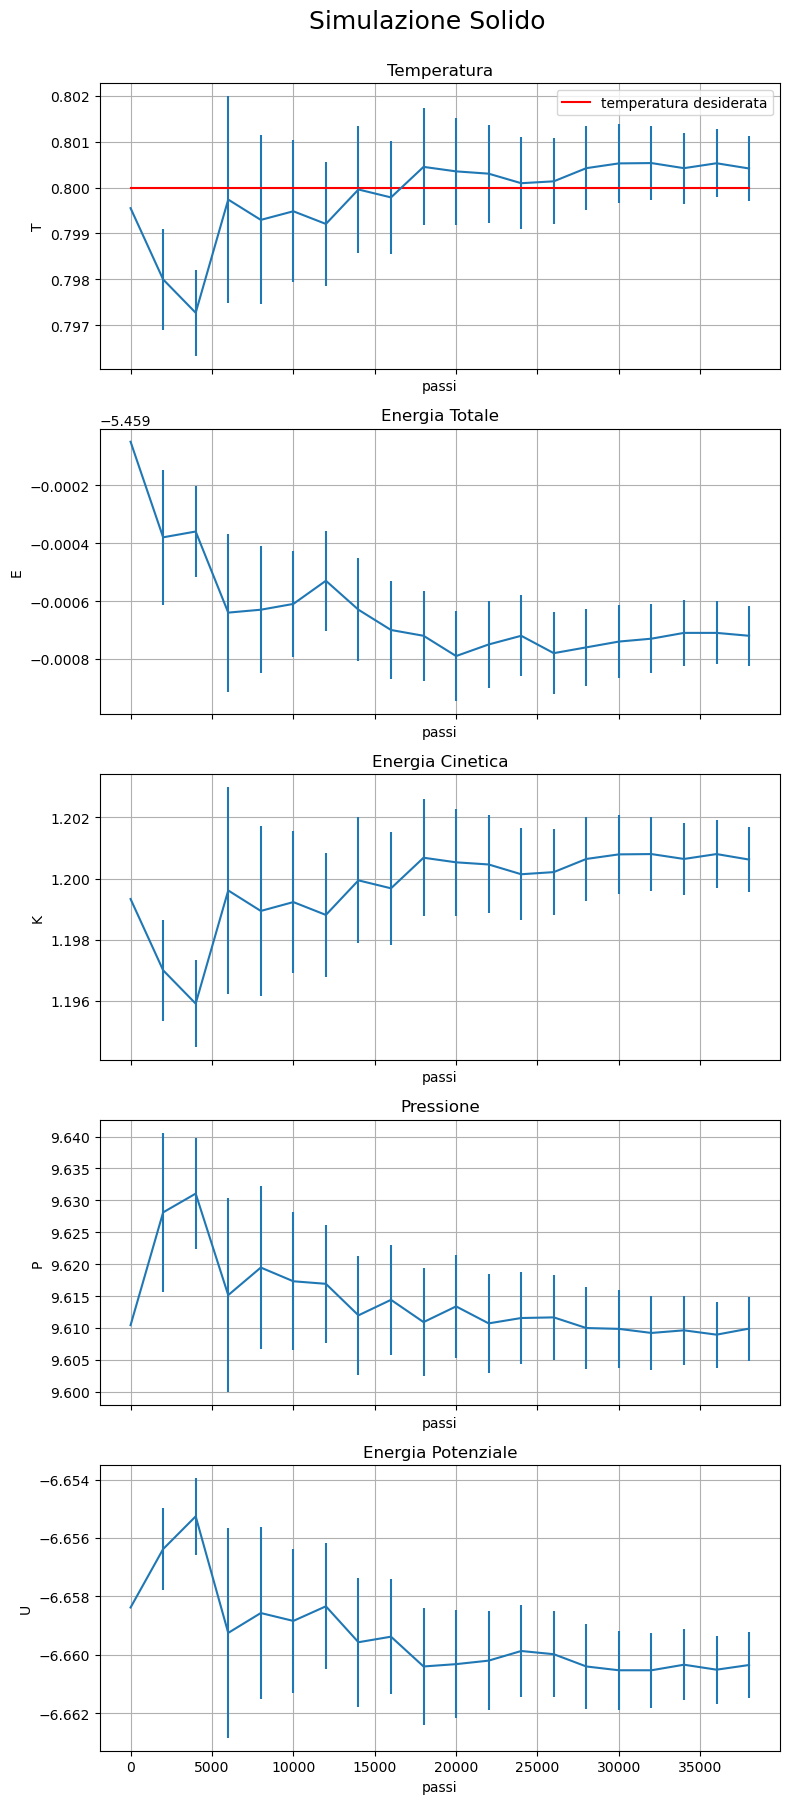

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Carica i dati dai file

x = np.arange(20)
x*=2000 
temp_data = np.loadtxt('risultati/solido/output_temp.dat')
etot_data = np.loadtxt('risultati/solido/output_etot.dat')
ekin_data = np.loadtxt('risultati/solido/output_ekin.dat')
press_data = np.loadtxt('risultati/solido/output_press.dat')
epot_data = np.loadtxt('risultati/solido/output_epot.dat')

# Crea un'unica figura con 5 subplot disposti in una colonna
fig, axs = plt.subplots(5, 1, figsize=(8, 18), sharex=True)

# Disegna il grafico per la temperatura
axs[0].errorbar(x, temp_data[:, 2], yerr=temp_data[:, 3])
axs[0].set_ylabel('T')
t=np.full(20,0.8)
axs[0].plot(x, t, color = "red" , label = "temperatura desiderata") 
axs[0].legend()
axs[0].set_xlabel('passi')
axs[0].grid(True)
axs[0].set_title('Temperatura')

# Disegna il grafico per l'energia totale
axs[1].errorbar(x, etot_data[:, 2], yerr=etot_data[:, 3])
axs[1].set_ylabel('E')
axs[1].set_xlabel('passi')
axs[1].grid(True)
axs[1].set_title('Energia Totale')

# Disegna il grafico per l'energia cinetica
axs[2].errorbar(x, ekin_data[:, 2], yerr=ekin_data[:, 3])
axs[2].set_ylabel('K')
axs[2].set_xlabel('passi')
axs[2].grid(True)
axs[2].set_title('Energia Cinetica')

# Disegna il grafico per la pressione
axs[3].errorbar(x, press_data[:, 2], yerr=press_data[:, 3])
axs[3].set_ylabel('P')
axs[3].set_xlabel('passi')
axs[3].grid(True)
axs[3].set_title('Pressione')

# Disegna il grafico per l'energia potenziale
axs[4].errorbar(x, epot_data[:, 2], yerr=epot_data[:, 3])
axs[4].set_xlabel('passi')
axs[4].set_ylabel('U')
axs[4].grid(True)
axs[4].set_title('Energia Potenziale')

# Mostra la figura con tutti i subplot

plt.suptitle('Simulazione Solido', size= 18, x=0.54, y=1)
plt.tight_layout()
plt.show()


Risultati:
1. temperatura: $0.800417 \pm 0.000714 $
2. energia totale: $-5.45972 \pm 0.000104 $
3. energia cinetica:  $1.20062 \pm 0.0010714 $
4. pressione: $ 9.6099 \pm 0.00501993 $
5. energia potenziale: $ -6.66035 \pm 0.0011187 $

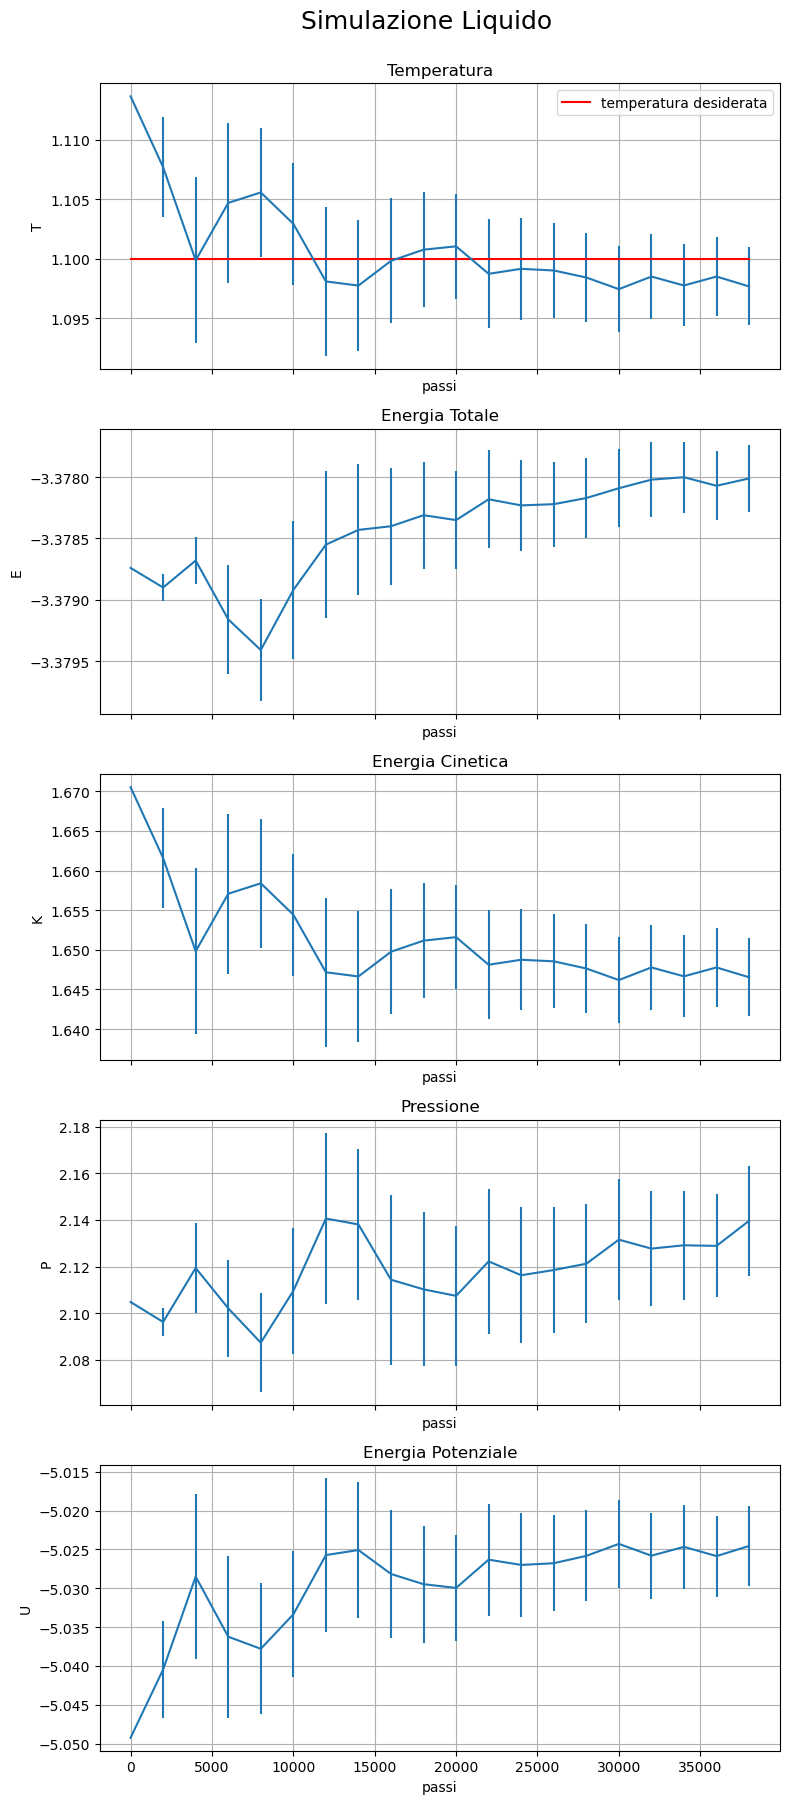

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Carica i dati dai file

x = np.arange(20)
x*=2000 
temp_data = np.loadtxt('risultati/liquido/output_temp.dat')
etot_data = np.loadtxt('risultati/liquido/output_etot.dat')
ekin_data = np.loadtxt('risultati/liquido/output_ekin.dat')
press_data = np.loadtxt('risultati/liquido/output_press.dat')
epot_data = np.loadtxt('risultati/liquido/output_epot.dat')

# Crea un'unica figura con 5 subplot disposti in una colonna
fig, axs = plt.subplots(5, 1, figsize=(8, 18), sharex=True)

# Disegna il grafico per la temperatura
axs[0].errorbar(x, temp_data[:, 2], yerr=temp_data[:, 3])
axs[0].set_ylabel('T')
t=np.full(20,1.1)
axs[0].plot(x, t, color = "red" , label = "temperatura desiderata") 
axs[0].legend()
axs[0].set_xlabel('passi')
axs[0].grid(True)
axs[0].set_title('Temperatura')

# Disegna il grafico per l'energia totale
axs[1].errorbar(x, etot_data[:, 2], yerr=etot_data[:, 3])
axs[1].set_ylabel('E')
axs[1].set_xlabel('passi')
axs[1].grid(True)
axs[1].set_title('Energia Totale')

# Disegna il grafico per l'energia cinetica
axs[2].errorbar(x, ekin_data[:, 2], yerr=ekin_data[:, 3])
axs[2].set_ylabel('K')
axs[2].set_xlabel('passi')
axs[2].grid(True)
axs[2].set_title('Energia Cinetica')

# Disegna il grafico per la pressione
axs[3].errorbar(x, press_data[:, 2], yerr=press_data[:, 3])
axs[3].set_ylabel('P')
axs[3].set_xlabel('passi')
axs[3].grid(True)
axs[3].set_title('Pressione')

# Disegna il grafico per l'energia potenziale
axs[4].errorbar(x, epot_data[:, 2], yerr=epot_data[:, 3])
axs[4].set_xlabel('passi')
axs[4].set_ylabel('U')
axs[4].grid(True)
axs[4].set_title('Energia Potenziale')

# Mostra la figura con tutti i subplot
plt.suptitle('Simulazione Liquido', size= 18, x=0.54, y=1)
plt.tight_layout()
plt.show()


Risultati:
1. temperatura: $ 1.09769 \pm 0.003281 $
2. energia totale: $ -3.37801 \pm 0.000273 $
3. energia cinetica: $  1.64654 \pm 0.0049212 $
4. pressione:   $ 2.13961 \pm  0.0234764 $
5. energia potenziale: $ -5.02455  \pm 0.00511208 $

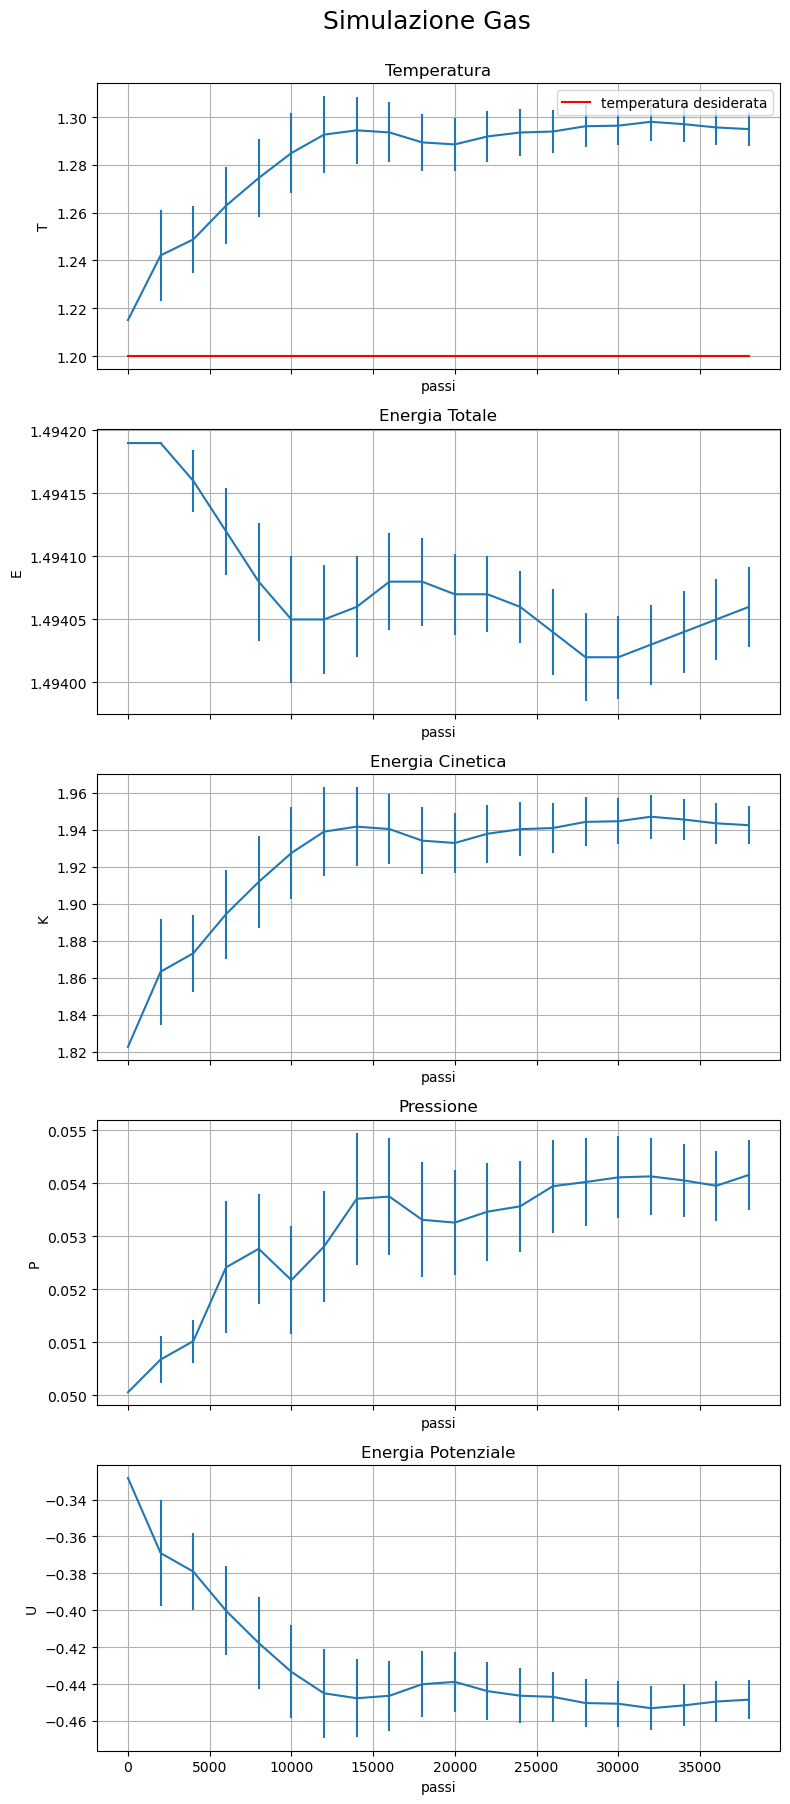

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Carica i dati dai file

x = np.arange(20)
x*=2000 
temp_data = np.loadtxt('risultati/gas/output_temp.dat')
etot_data = np.loadtxt('risultati/gas/output_etot.dat')
ekin_data = np.loadtxt('risultati/gas/output_ekin.dat')
press_data = np.loadtxt('risultati/gas/output_press.dat')
epot_data = np.loadtxt('risultati/gas/output_epot.dat')

# Crea un'unica figura con 5 subplot disposti in una colonna
fig, axs = plt.subplots(5, 1, figsize=(8, 18), sharex=True)

# Disegna il grafico per la temperatura
axs[0].errorbar(x, temp_data[:, 2], yerr=temp_data[:, 3])
axs[0].set_ylabel('T')
t=np.full(20,1.2)
axs[0].plot(x, t, color = "red" , label = "temperatura desiderata") 
axs[0].legend()
axs[0].set_xlabel('passi')
axs[0].grid(True)
axs[0].set_title('Temperatura')

# Disegna il grafico per l'energia totale
axs[1].errorbar(x, etot_data[:, 2], yerr=etot_data[:, 3])
axs[1].set_ylabel('E')
axs[1].set_xlabel('passi')
axs[1].grid(True)
axs[1].set_title('Energia Totale')

# Disegna il grafico per l'energia cinetica
axs[2].errorbar(x, ekin_data[:, 2], yerr=ekin_data[:, 3])
axs[2].set_ylabel('K')
axs[2].set_xlabel('passi')
axs[2].grid(True)
axs[2].set_title('Energia Cinetica')

# Disegna il grafico per la pressione
axs[3].errorbar(x, press_data[:, 2], yerr=press_data[:, 3])
axs[3].set_ylabel('P')
axs[3].set_xlabel('passi')
axs[3].grid(True)
axs[3].set_title('Pressione')

# Disegna il grafico per l'energia potenziale
axs[4].errorbar(x, epot_data[:, 2], yerr=epot_data[:, 3])
axs[4].set_xlabel('passi')
axs[4].set_ylabel('U')
axs[4].grid(True)
axs[4].set_title('Energia Potenziale')

# Mostra la figura con tutti i subplot
plt.suptitle('Simulazione Gas', size= 18, x=0.54, y=1)
plt.tight_layout()
plt.show()


Risultati:
1. temperatura: $ 1.29501 \pm 0.00694875 $
2. energia totale: $ 1.49406 \pm 3.15271e-05 $
3. energia cinetica: $  1.94252 \pm  0.0104231 $
4. pressione: $ 0.0541553 \pm 0.000661489 $
5. energia potenziale: $  -0.448459 \pm  0.0104405 $

Possiamo ossservare che nonostante il sistema sia stato equilibrato a una temperatura di 1.2, la temperatura media misurata dopo 35000 passi sia 1.26, questo è spiegato dal fatto che lo stato gassoso non riesca a stabilizzarsi in maniera definitiva, a differenza degli altri due stati, ma continua a oscillare trovando solo dei brevi periodi di stabilizzazione. 

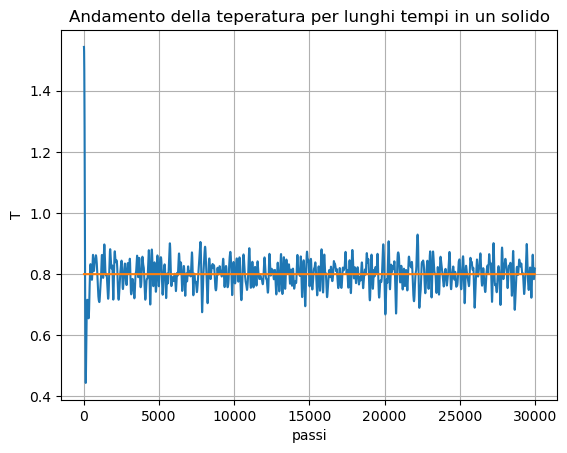

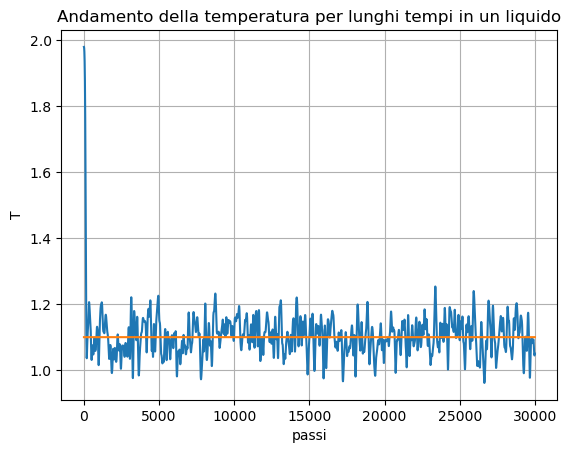

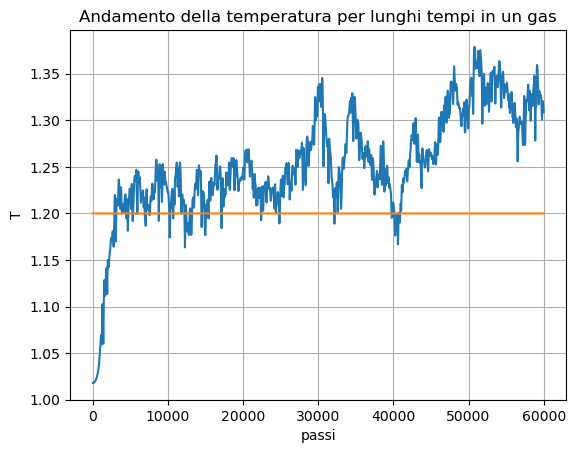

In [11]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(30000)

# Carica i dati dal file
data = np.loadtxt('risultati/solido/output_tempeqlunga.dat')

plt.plot(x,data[:,1])
plt.plot(x,np.array([0.8 for i in range (0,30000)]))
plt.xlabel('passi')
plt.ylabel('T')
plt.grid(True)
plt.title('Andamento della teperatura per lunghi tempi in un solido')

plt.show()

x = np.arange(30000)

# Carica i dati dal file
data = np.loadtxt('risultati/liquido/output_tempeqlunga.dat')

plt.plot(x,data[:,1])
plt.plot(x,np.array([1.1 for i in range (0,30000)]))
plt.xlabel('passi')
plt.ylabel('T')
plt.grid(True)
plt.title('Andamento della temperatura per lunghi tempi in un liquido')
plt.show()

x3= np.arange(60000)

# Carica i dati dal file
data3 = np.loadtxt('risultati/gas/output_tempeqlunga.dat')

plt.plot(x3,data3[:,1])
plt.plot(x3,np.array([1.2 for i in range (0,60000)]))
plt.xlabel('passi')
plt.ylabel('T')
plt.grid(True)
plt.title('Andamento della temperatura per lunghi tempi in un gas')
plt.show()